# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [2]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [3]:
df = pd.read_csv('housing_data.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [6]:
columns_list = list(df.columns)
print(*columns_list, sep = "\n")

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

(array([  2.,   1.,   3.,   2.,   3.,  13.,  12.,  16.,  19.,  28.,  32.,
         55.,  67.,  88., 102., 131., 131., 174., 168., 200., 241., 263.,
        268., 259., 282., 281., 235., 274., 247., 215., 209., 194., 148.,
        135., 107.,  86.,  89.,  57.,  48.,  34.,  25.,  11.,  16.,   7.,
          9.,   5.,   4.,   3.,   0.,   1.]),
 array([  15938.65792329,   65001.19664832,  114063.73537334,
         163126.27409837,  212188.8128234 ,  261251.35154843,
         310313.89027346,  359376.42899849,  408438.96772351,
         457501.50644854,  506564.04517357,  555626.5838986 ,
         604689.12262363,  653751.66134866,  702814.20007368,
         751876.73879871,  800939.27752374,  850001.81624877,
         899064.3549738 ,  948126.89369883,  997189.43242385,
        1046251.97114888, 1095314.50987391, 1144377.04859894,
        1193439.58732397, 1242502.126049  , 1291564.66477402,
        1340627.20349905, 1389689.74222408, 1438752.28094911,
        1487814.81967414, 1536877.3583

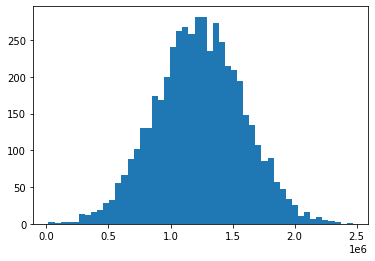

In [7]:
plt.hist(df['Price'], bins = 50)

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [8]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [9]:
columns_list.pop(6)
columns_list.pop(5)
print(columns_list)
X = pd.DataFrame(df[columns_list])
Y = df["Price"]
Y.columns = ['Price']

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']


In [10]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
print(Y.shape)

(5000, 5)
(5000,)


In [11]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [12]:
# print a few record of y
# add code here
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [13]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [14]:
# add code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 9)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [15]:
# add code here
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

3500
1500
3500
1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [16]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [17]:
# add code here
lm.fit(X_train.values,Y_train.values)

LinearRegression()

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [18]:
# add code here
predictions = lm.predict(X_test.values)
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(1500,)


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

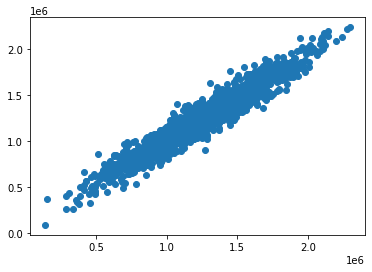

In [19]:
# add code here
plt.scatter(Y_test, predictions)

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [20]:
# add code here
r_square = sklearn.metrics.r2_score(Y_test,predictions)
r_square = round(r_square,3)
print(r_square)

0.918


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [24]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [25]:
# add code here
df = pd.read_csv('classified_data.txt', index_col = 0 )
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [26]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [27]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [28]:
columns_list = list(df.columns)

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [29]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [30]:
# add code here
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaler_arr = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [31]:
# add code here
columns_list.pop()
df_feat = pd.DataFrame(scaler_arr, columns = columns_list )
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [32]:
# add code here
X = df_feat
Y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [33]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 9)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [34]:
# add code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [35]:
# add code here
pred = knn.predict(X_test)

c:\users\rajesh\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [66]:
# add code here
from sklearn.metrics import classification_report

print(classification_report(Y_test,pred, output_dict=True))

{'0': {'precision': 0.891156462585034, 'recall': 0.8972602739726028, 'f1-score': 0.89419795221843, 'support': 146}, '1': {'precision': 0.9019607843137255, 'recall': 0.8961038961038961, 'f1-score': 0.8990228013029317, 'support': 154}, 'accuracy': 0.8966666666666666, 'macro avg': {'precision': 0.8965586234493798, 'recall': 0.8966820850382494, 'f1-score': 0.8966103767606808, 'support': 300}, 'weighted avg': {'precision': 0.896702681072429, 'recall': 0.8966666666666666, 'f1-score': 0.8966747080818076, 'support': 300}}


**Print the accuracy using numpy and round it to 3 decimal places.**

In [65]:
# add code here
np.around()

'precisionrecallf1-scoresupport\n\n00.890.900.89146\n10.900.900.90154\n\naccuracy0.90300\nmacroavg0.900.900.90300\nweightedavg0.900.900.90300\n'

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [36]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here


**Plot a graph of K value vs Accuracy**

In [37]:
# add code here


**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [38]:
# add code here 

# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [172]:
#write code here
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [173]:
def titanic_preprocessing_pipeline(df):
    
    import re
    title_list = []
    
    for i in range(len(df['Name'])):
        name = df['Name'][i]
        title_search = re.search('(\w+)\.', name) #the first argument is a pattern that we are looking for
        if title_search:
            title = title_search.group(1) #extracting the pattern found by regular expression (title here)
            title_list.append(title)
    df['Title'] = title_list
    
    df.drop(['PassengerId', 'Ticket','Name'], axis = 1, inplace = True)
    
    df.drop(['Cabin'],axis = 1,inplace = True)
    
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    
    df['Family_Members'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp','Parch'],axis = 1, inplace = True)
    
    return(df)
    
def standardize(data_list):
    X_new_list = []
    X_mean = sum(data_list)/len(data_list)
    variance = sum([((X - X_mean) ** 2) for X in data_list]) / len(data_list)
    X_std = variance ** 0.5
    
    for X in data_list:
        X_new = (X - X_mean)/X_std
        X_new_list.append(X_new)
    return X_new_list

def normalize(data_list):
    X_new_list = []
    X_min = min(data_list)
    X_max = max(data_list)
    
    for X in data_list:
        X_new = (X - X_min)/(X_max - X_min)
        X_new_list.append(X_new)
    return X_new_list

def one_hot_encode(df):
    one_hot_encoding_columns = ['Sex','Pclass','Title','Embarked']
    for column in one_hot_encoding_columns:
        tempdf = pd.get_dummies(df[column], prefix=column)
        
        df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
        )
        df = df.drop(columns = column)
    
    return(df)

new_df = titanic_preprocessing_pipeline(titanic_df)

new_df['Age'] = normalize(titanic_df['Age'])
new_df['Fare'] = standardize(titanic_df['Fare'])
new_df['Family_Members'] = normalize(titanic_df['Family_Members'])


new_df = one_hot_encode(new_df)


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [174]:
Y_label = new_df['Survived']
print(y_label)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<b>remove the y_label (survived) from the dataframe</b>

In [175]:
new_df.drop(['Survived'],axis = 1, inplace = True)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df, Y_label, test_size = 0.3, random_state = 9)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [190]:
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier(max_depth = 4, random_state = 9)
dtm.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=9)

<b>print the test accuracy and train accuracy here</b>

In [191]:
dtm.score(X_train,Y_train)

0.8539325842696629

In [192]:
dtm.score(X_test,Y_test)

0.8134328358208955